In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import six
from help import helper as hp
import numpy as np
import os
from joblib import load

In [2]:
'''
Class ini berfungsi untuk menggambarkan dan menyimpan confusion matrix
pada suatu data. Confusion matrix yang ditampilkan bisa lebih dari satu
'''
class ConfusionMatrix:

    def __init__(self, figsize, num_rows, num_cols, labels):
        self.figsize = figsize
        self.num_rows = num_rows
        self.num_cols = num_cols
        self.plots = []
        self.fig = None
        self.gs = None
        self.labels = labels
        self.xylabel_size = 12
        self.label_size = 12
        self.count_size = 12
        self.suptitle = None

    '''
    Menambahkan confusion matrix
    '''
    def add(self, Y_true, Y_pred, title, row_title = 'Kelas Sebenarnya', col_title = 'Kelas Prediksi', cmap = plt.cm.Blues):
        self.plots.append(
            [Y_true, Y_pred, title, row_title, col_title, cmap]
        )

    '''
    Menampilkan seluruh confusion matrix
    '''
    def show(self):
        self.fig = plt.figure(figsize = self.figsize, dpi = 300)
        self.gs = GridSpec(self.num_rows, self.num_cols, figure = self.fig)
        self.fig.suptitle(self.suptitle, fontsize = 20, va = 'center', ha = 'center')

        for index, subplot in enumerate(self.plots):
            self.draw_conf_mat(subplot, index + 1)

    '''
    Menggambar suatu confusion matrix
    '''
    def draw_conf_mat(self, data, index):
        Y_true = data[0]
        Y_pred = data[1]
        title = data[2]
        ylabel = data[3]
        xlabel = data[4]
        cmap = data[5]

        # Mendapatkan lokasi confusion matrix yang akan ditampilkan
        row_pos = int(np.ceil(index / self.num_cols))
        col_pos = int(index - (self.num_cols * (row_pos - 1)))

        conf_mat = confusion_matrix(Y_true, Y_pred)
        percentage = (conf_mat / conf_mat.sum(axis = 1)[:, np.newaxis]) * 100

        axes = plt.subplot(self.gs[row_pos - 1, col_pos - 1])
        im = axes.imshow(conf_mat, interpolation = 'nearest', cmap = cmap)

        axes.set(
            xticks = np.arange(conf_mat.shape[1]),
            yticks = np.arange(conf_mat.shape[0]),
            xticklabels = self.labels, 
            yticklabels = self.labels,
            ylabel = ylabel,
            xlabel = xlabel
            )
        
        axes.title.set_position([0.5, 1.1])
        axes.title.set_text(title)
        axes.title.set_size(15)
        axes.yaxis.label.set_size(self.xylabel_size)
        axes.xaxis.label.set_size(self.xylabel_size)

        # Rotate the tick labels and set their alignment.
        plt.setp(axes.get_xticklabels(), rotation = 45, ha = "right",
                rotation_mode = "anchor", fontsize = self.label_size)
        plt.setp(axes.get_yticklabels(), fontsize = self.label_size)

        # Loop over data dimensions and create text annotations.
        thresh = conf_mat.max() / 2.
        for i in range(conf_mat.shape[0]):
            for j in range(conf_mat.shape[1]):
                content = f'{percentage[i, j]:.2f}%'

                axes.text(j, i, content,
                        ha="center", va="center",
                        color="white" if conf_mat[i, j] > thresh else "black",
                        fontsize = self.count_size)
                
        akurasi = np.around(accuracy_score(Y_true, Y_pred) * 100, 2)
        axes.text(0.5, 1.05, f'Akurasi : {akurasi}%', fontsize = 13, ha = 'center', transform = axes.transAxes)
        
    '''
    Menyimpan confusion matrix pada path tertentu
    '''
    def save(self, path, dpi = 400):
        plt.savefig(path, bbox_inches = 'tight', dpi = dpi)

In [3]:
expressions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
expressions = np.array(expressions)
expressions

array(['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'],
      dtype='<U8')

### Semua ras

In [4]:
cmdata = {}
kfold = hp.loadjson('dataset/kfold.json')
dpaths = np.array([f'dataset/vectors/dae/{path}' for path in os.listdir('dataset/vectors/dae')])
dkeys = np.array(list(kfold.keys()))
dkeys = dkeys[hp.swhere('all', dkeys) | hp.swhere('race', dkeys)]
dkeys = ['all']
for dkey in dkeys:
    print(dkey)
    for fkey in kfold[dkey]:
        # looping model
        model = 550
        # load data training
        x = []
        for wholedkey in kfold[dkey][fkey]['test']:
            train_index = kfold[dkey][fkey]['test'][wholedkey]
            x.extend(load(f'dataset/vectors/dae/{wholedkey}.{model}.jlb')[train_index])
        x = np.array(x)
        y = expressions[x[:,-1].astype(np.int)]
        x = x[:,:-1]
        svm = load(f'model/svm/kfold/svm.{dkey}.{fkey}.{model}.jlb')
        print(np.around(svm.score(x, y) * 100, 2))
        cmdata[fkey] = [y, svm.predict(x)]

all
70.09
71.18
72.23
70.71
71.04


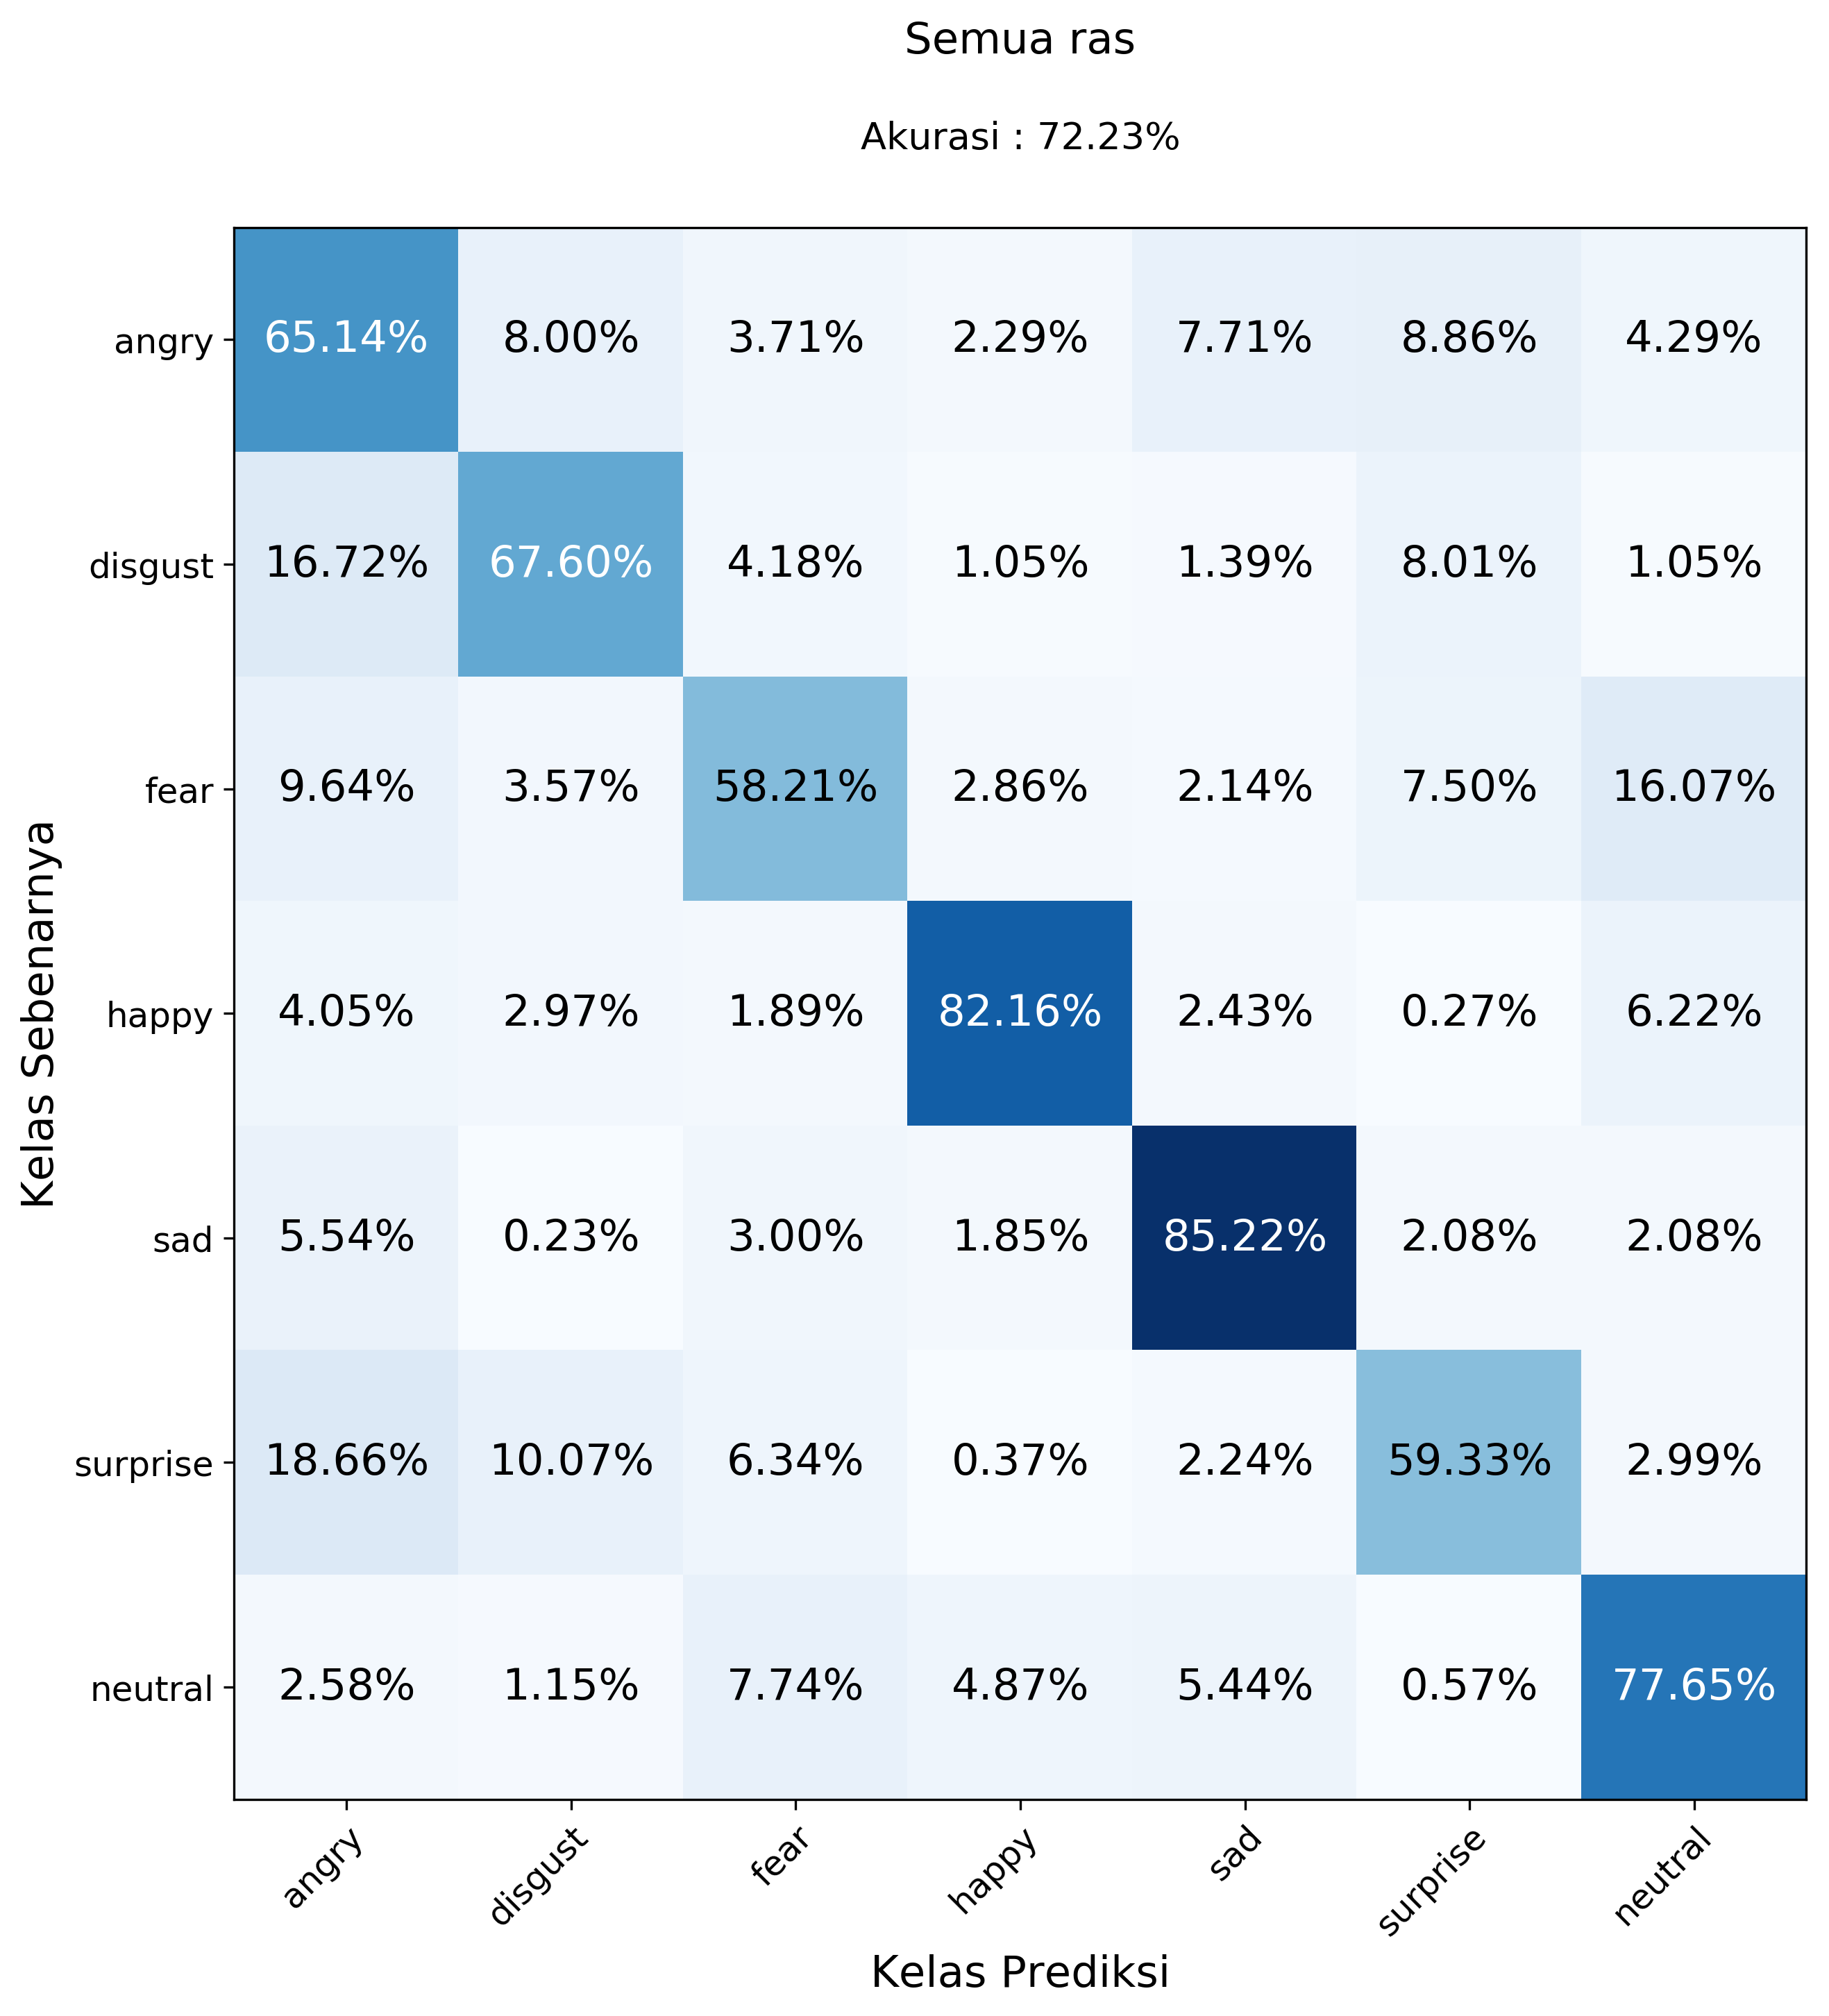

In [5]:
cfms = []
for title in cmdata:
    cfm = ConfusionMatrix((10, 10), 1, 1, expressions)
    cfm.count_size = 15
    cfm.xylabel_size = 15
    cfm.add(cmdata[title][0], cmdata[title][1], 'Semua ras')
    cfms.append(cfm)
cfms[2].show()

## Asia Tenggara

In [6]:
cmdata = {}
kfold = hp.loadjson('dataset/kfold.json')
dpaths = np.array([f'dataset/vectors/dae/{path}' for path in os.listdir('dataset/vectors/dae')])
dkeys = np.array(list(kfold.keys()))
dkeys = dkeys[hp.swhere('all', dkeys) | hp.swhere('race', dkeys)]
dkeys = ['race Asia Tenggara']
for dkey in dkeys:
    print(dkey)
    for fkey in kfold[dkey]:
        # looping model
        model = '1000-410'
        # load data training
        x = []
        for wholedkey in kfold[dkey][fkey]['test']:
            train_index = kfold[dkey][fkey]['test'][wholedkey]
            x.extend(load(f'dataset/vectors/dae/{wholedkey}.{model}.jlb')[train_index])
        x = np.array(x)
        y = expressions[x[:,-1].astype(np.int)]
        x = x[:,:-1]
        svm = load(f'model/svm/kfold/svm.{dkey}.{fkey}.{model}.jlb')
        print(np.around(svm.score(x, y) * 100, 2))
        cmdata[fkey] = [y, svm.predict(x)]

race Asia Tenggara
99.42
99.61
98.64
99.61
98.64


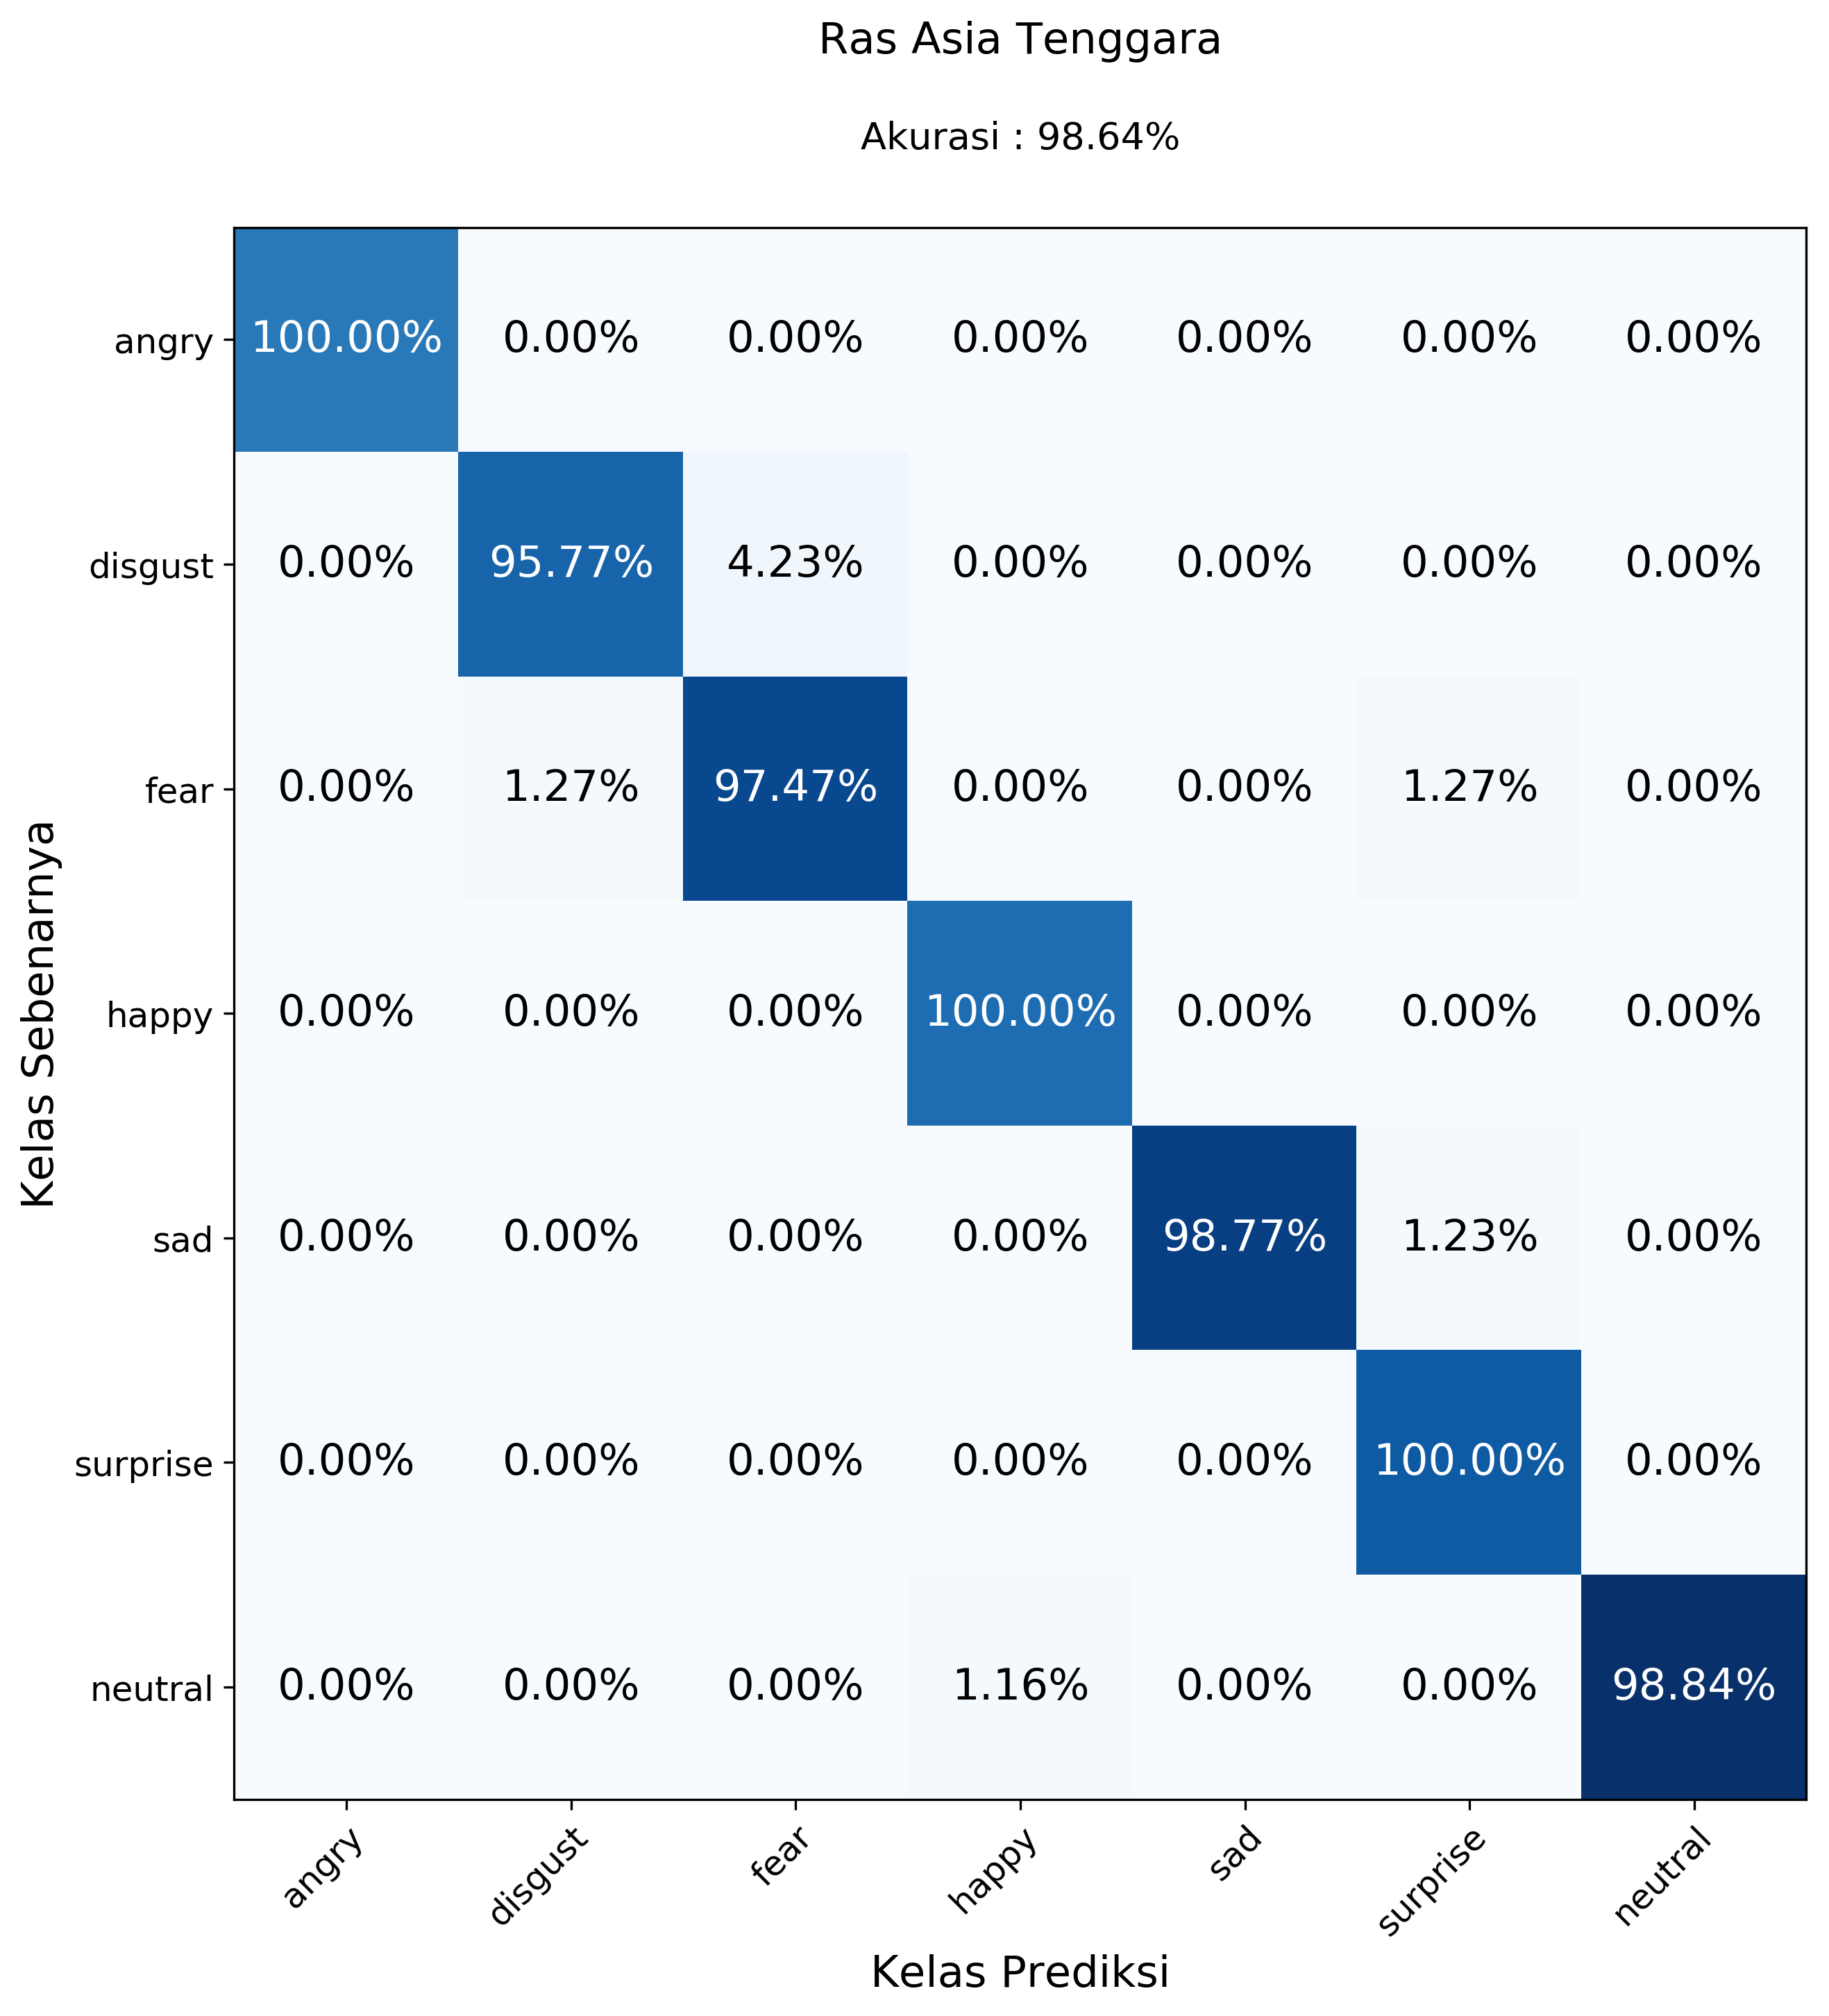

In [7]:
cfms = []
for title in cmdata:
    cfm = ConfusionMatrix((10, 10), 1, 1, expressions)
    cfm.count_size = 15
    cfm.xylabel_size = 15
    cfm.add(cmdata[title][0], cmdata[title][1], 'Ras Asia Tenggara')
    cfms.append(cfm)
cfms[2].show()

## Asia Timur

In [8]:
cmdata = {}
kfold = hp.loadjson('dataset/kfold.json')
dpaths = np.array([f'dataset/vectors/dae/{path}' for path in os.listdir('dataset/vectors/dae')])
dkeys = ['race Asia Timur']
for dkey in dkeys:
    print(dkey)
    for fkey in kfold[dkey]:
        # looping model
        model = '430'
        # load data training
        x = []
        for wholedkey in kfold[dkey][fkey]['test']:
            train_index = kfold[dkey][fkey]['test'][wholedkey]
            x.extend(load(f'dataset/vectors/dae/{wholedkey}.{model}.jlb')[train_index])
        x = np.array(x)
        y = expressions[x[:,-1].astype(np.int)]
        x = x[:,:-1]
        svm = load(f'model/svm/kfold/svm.{dkey}.{fkey}.{model}.jlb')
        print(np.around(svm.score(x, y) * 100, 2))
        cmdata[fkey] = [y, svm.predict(x)]

race Asia Timur
56.0
55.26
54.78
54.11
52.89


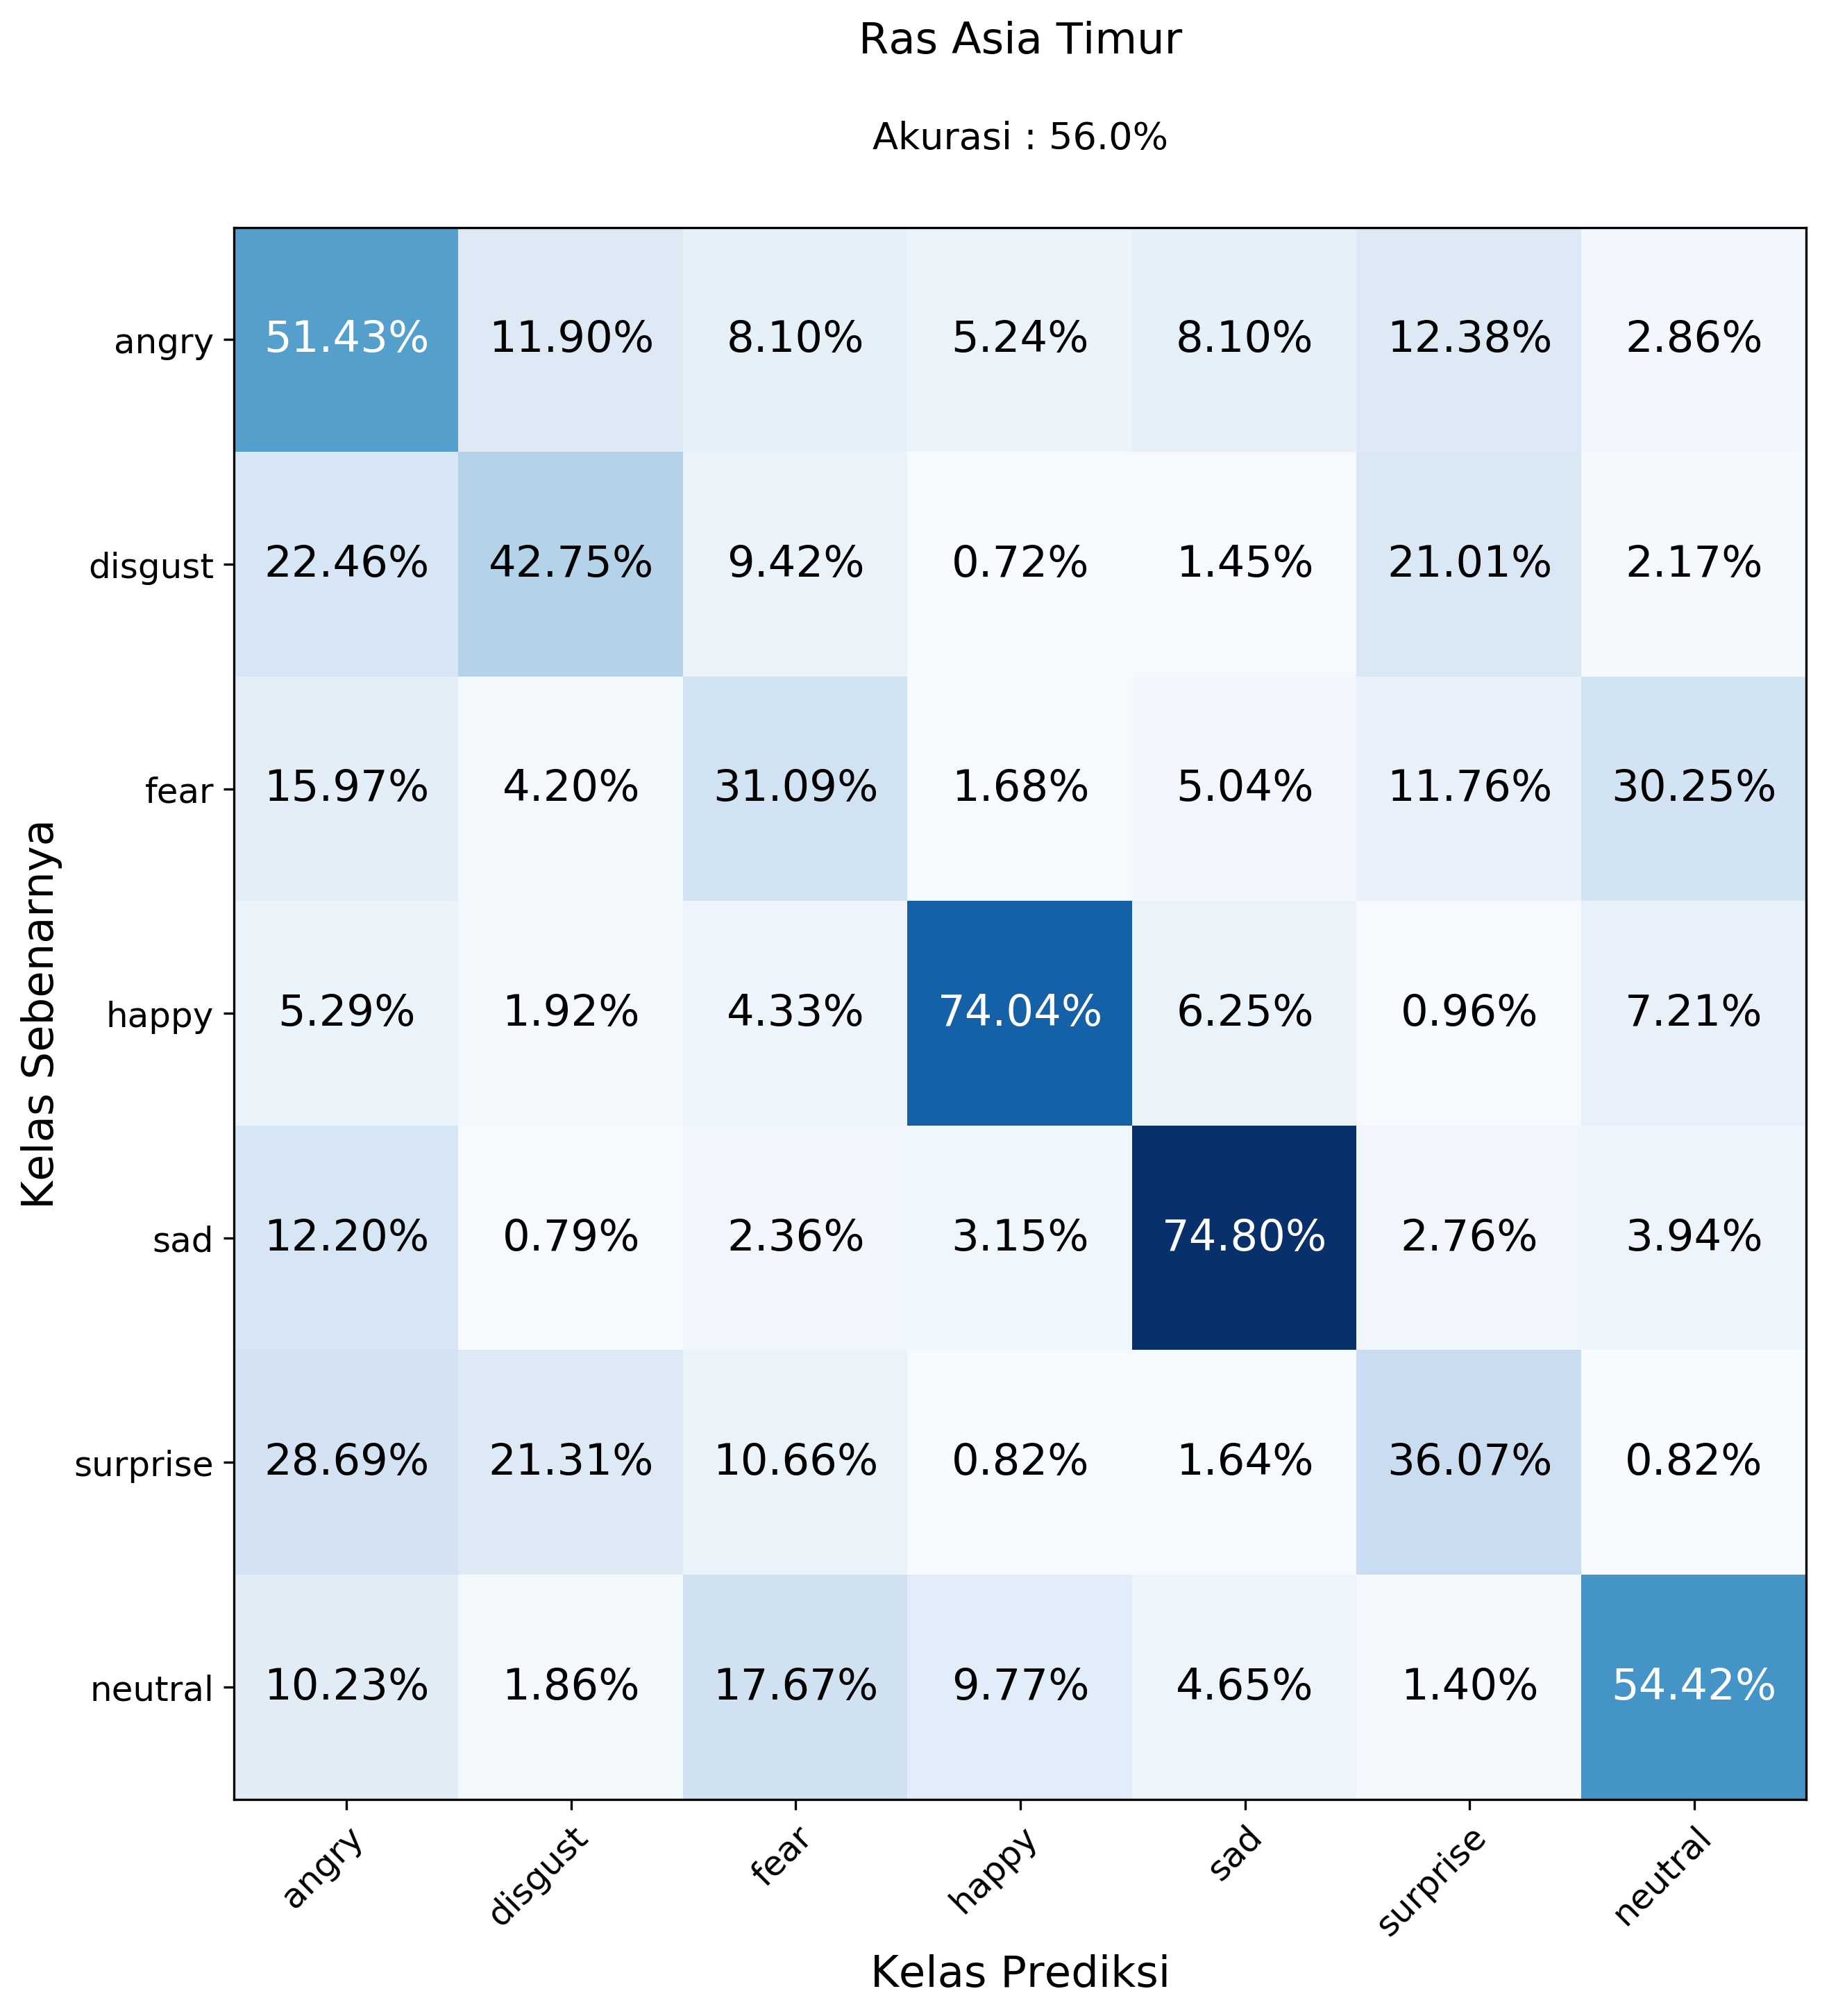

In [9]:
cfms = []
for title in cmdata:
    cfm = ConfusionMatrix((10, 10), 1, 1, expressions)
    cfm.count_size = 15
    cfm.xylabel_size = 15
    cfm.add(cmdata[title][0], cmdata[title][1], 'Ras Asia Timur')
    cfms.append(cfm)
cfms[0].show()

## Eropa Utara

In [10]:
cmdata = {}
kfold = hp.loadjson('dataset/kfold.json')
dpaths = np.array([f'dataset/vectors/dae/{path}' for path in os.listdir('dataset/vectors/dae')])
dkeys = ['race Eropa Utara']
for dkey in dkeys:
    print(dkey)
    for fkey in kfold[dkey]:
        # looping model
        model = '550'
        # load data training
        x = []
        for wholedkey in kfold[dkey][fkey]['test']:
            train_index = kfold[dkey][fkey]['test'][wholedkey]
            x.extend(load(f'dataset/vectors/dae/{wholedkey}.{model}.jlb')[train_index])
        x = np.array(x)
        y = expressions[x[:,-1].astype(np.int)]
        x = x[:,:-1]
        svm = load(f'model/svm/kfold/svm.{dkey}.{fkey}.{model}.jlb')
        print(np.around(svm.score(x, y) * 100, 2))
        cmdata[fkey] = [y, svm.predict(x)]

race Eropa Utara
82.65
82.14
82.65
81.63
87.24


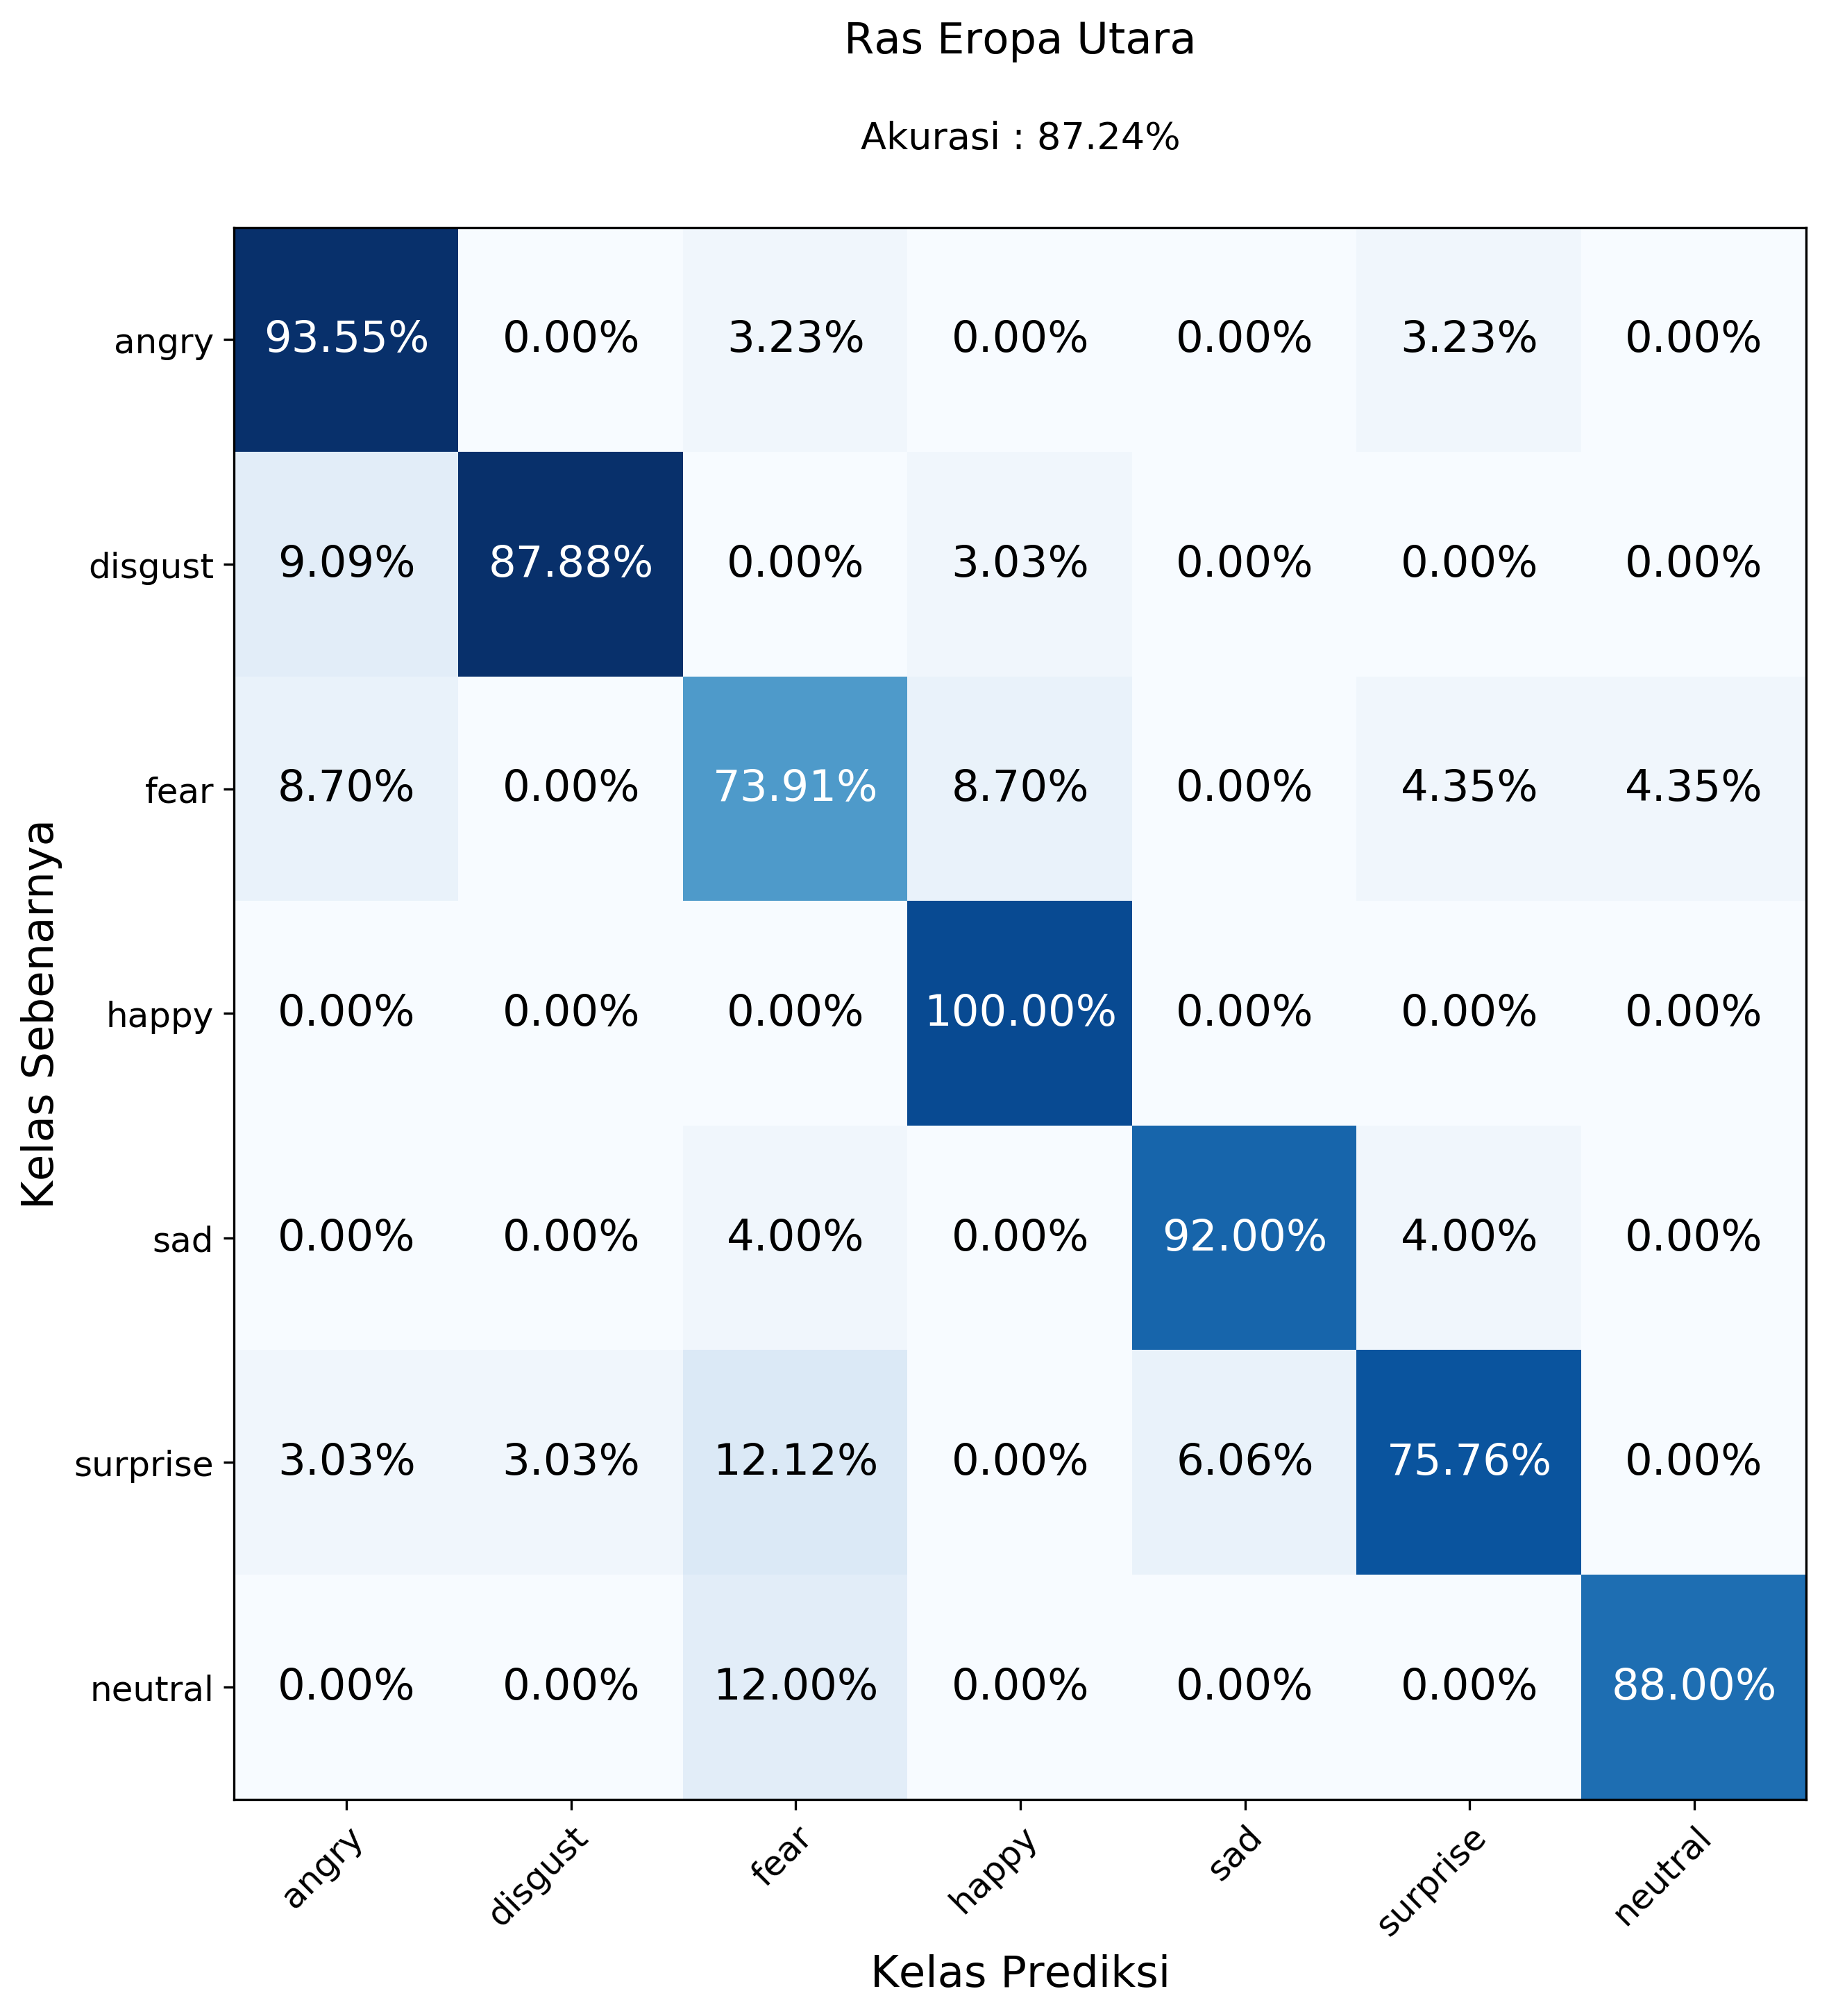

In [11]:
cfms = []
for title in cmdata:
    cfm = ConfusionMatrix((10, 10), 1, 1, expressions)
    cfm.count_size = 15
    cfm.xylabel_size = 15
    cfm.add(cmdata[title][0], cmdata[title][1], 'Ras Eropa Utara')
    cfms.append(cfm)
cfms[4].show()

## Amerika Serikat

In [12]:
cmdata = {}
kfold = hp.loadjson('dataset/kfold.json')
dpaths = np.array([f'dataset/vectors/dae/{path}' for path in os.listdir('dataset/vectors/dae')])
dkeys = ['race Amerika Serikat']
for dkey in dkeys:
    print(dkey)
    for fkey in kfold[dkey]:
        # looping model
        model = '400'
        # load data training
        x = []
        for wholedkey in kfold[dkey][fkey]['test']:
            train_index = kfold[dkey][fkey]['test'][wholedkey]
            x.extend(load(f'dataset/vectors/dae/{wholedkey}.{model}.jlb')[train_index])
        x = np.array(x)
        y = expressions[x[:,-1].astype(np.int)]
        x = x[:,:-1]
        svm = load(f'model/svm/kfold/svm.{dkey}.{fkey}.{model}.jlb')
        print(np.around(svm.score(x, y) * 100, 2))
        cmdata[fkey] = [y, svm.predict(x)]

race Amerika Serikat
91.76
90.38
89.78
91.99
89.78


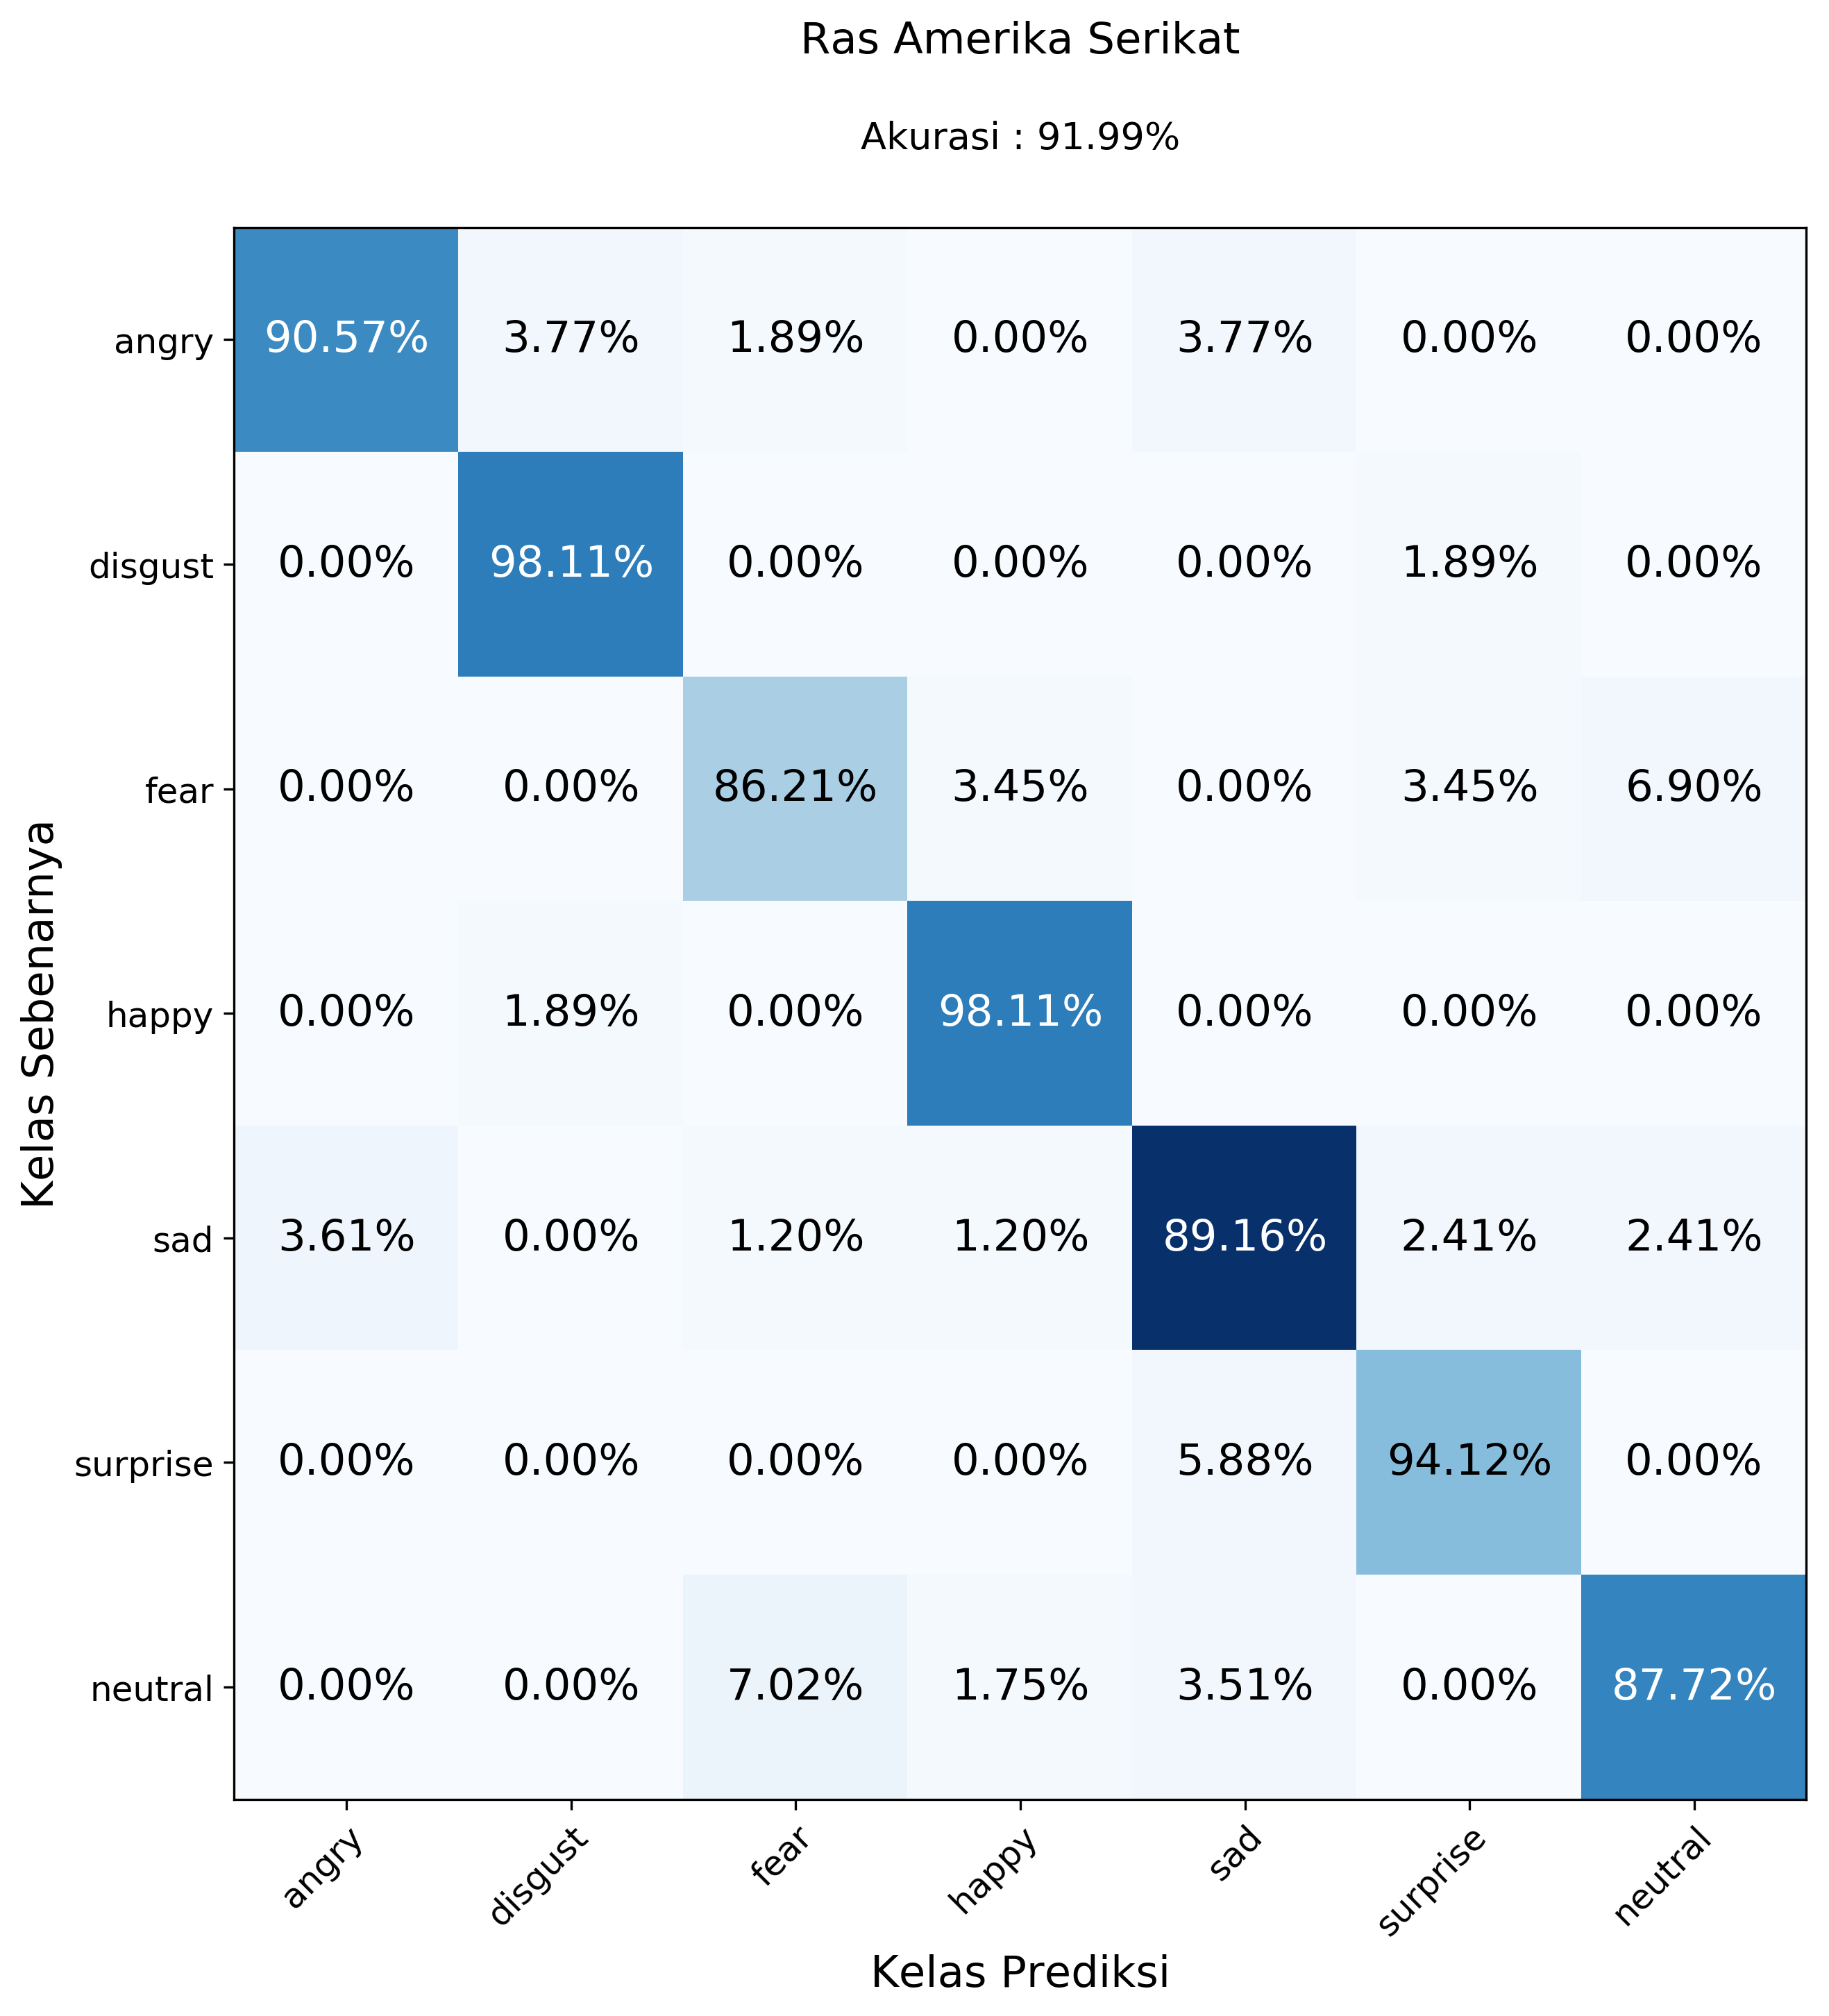

In [13]:
cfms = []
for title in cmdata:
    cfm = ConfusionMatrix((10, 10), 1, 1, expressions)
    cfm.count_size = 15
    cfm.xylabel_size = 15
    cfm.add(cmdata[title][0], cmdata[title][1], 'Ras Amerika Serikat')
    cfms.append(cfm)
cfms[3].show()